In [52]:
import os
os.chdir("..")
print(os.getcwd())

/Users/rosinatorres/Documents/PhD/Project/Code/MS2LDA


In [2]:
from Preprocessing.load_and_clean import load_mgf
from Preprocessing.load_and_clean import clean_spectra

from Preprocessing.generate_corpus import features_to_words
from Preprocessing.generate_corpus import combine_features

In [3]:
spectra_path = "test_data/pos_ache_inhibitors_pesticides.mgf"
spectra = load_mgf(spectra_path)
cleaned_spectra = clean_spectra(spectra)
fragment_words, loss_words = features_to_words(cleaned_spectra)
feature_words = combine_features(fragment_words, loss_words)

In [4]:
from MS2LDA.modeling import define_model
from MS2LDA.modeling import train_model
from MS2LDA.modeling import extract_motifs
from MS2LDA.modeling import create_motif_spectra

In [22]:
model_parameters = {"rm_top":2}
train_parameters = {"parallel": 4}
ms2lda = define_model(n_motifs=50, model_parameters=model_parameters)
trained_ms2lda = train_model(ms2lda, feature_words, iterations=300, train_parameters=train_parameters)

In [23]:
from tomotopy.coherence import Coherence
import tomotopy as tp
coherence=tp.coherence.Coherence(trained_ms2lda, coherence='c_v')
print(coherence.get_score())

0.6241476942300795


In [24]:
# retrieves motif from LDA model and converts it into a matchms spectrum object
motifs = extract_motifs(trained_ms2lda, top_n=20)
motif_spectra = create_motif_spectra(motifs)

In [25]:
import tmplot as tmp
phi = tmp.get_phi(trained_ms2lda)
phi

topics,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
words,,,,,,,,,,,,,,,,,,,,,
frag@77.04,0.012802,0.017025,0.012525,0.014070,0.012357,0.014801,0.015063,0.011731,0.012911,0.010090,...,0.013045,0.011823,0.015040,0.012303,0.011974,0.011840,0.013882,0.013179,0.012542,0.012432
frag@142.99,0.011013,0.011074,0.012661,0.010588,0.013297,0.012900,0.011470,0.012549,0.012367,0.010362,...,0.011142,0.012647,0.012418,0.014900,0.012252,0.010751,0.011523,0.012092,0.012815,0.011742
frag@114.96,0.011701,0.010382,0.010483,0.012120,0.010074,0.010456,0.011056,0.012140,0.011823,0.011862,...,0.011550,0.012097,0.012694,0.011620,0.010303,0.012248,0.011523,0.014537,0.011043,0.011327
frag@127.02,0.008535,0.008306,0.011300,0.010030,0.010477,0.009913,0.009812,0.009276,0.009242,0.009681,...,0.007746,0.006599,0.009659,0.008476,0.008911,0.011567,0.009440,0.008152,0.010770,0.009255
frag@72.04,0.009361,0.008998,0.008986,0.010866,0.009134,0.010185,0.008154,0.009003,0.008562,0.006954,...,0.009512,0.009623,0.010073,0.007656,0.010025,0.010071,0.009163,0.007609,0.011179,0.008289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
frag@98.1,0.000001,0.000001,0.000137,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
frag@190.94,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
frag@82.07,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001


In [26]:
topics_coords = tmp.prepare_coords(trained_ms2lda)
topics_coords.head()

,x,y,topic,size,label
0,1.292502,1.311546,0,1.991350,0
1,0.779019,-1.318558,1,1.980863,1
2,0.377850,-1.126774,2,2.001941,2
3,0.441041,-1.838126,3,1.955982,3
4,-0.501311,-1.325633,4,2.062187,4


In [27]:
tmp.plot_scatter_topics(topics_coords, size_col='size', label_col='label')

alt.LayerChart(...)

In [28]:
terms_probs = tmp.calc_terms_probs_ratio(phi, topic=10, lambda_=1)
tmp.plot_terms(terms_probs)

alt.Chart(...)

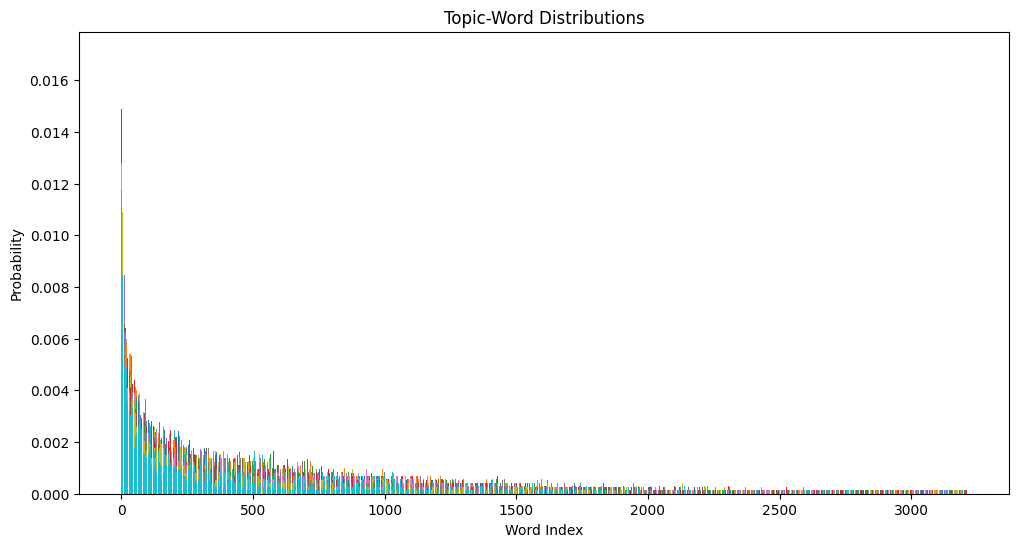

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for k in range(trained_ms2lda.k):
    plt.bar(range(trained_ms2lda.num_vocabs), trained_ms2lda.get_topic_word_dist(k))
plt.xlabel('Word Index')
plt.ylabel('Probability')
plt.title('Topic-Word Distributions')
#plt.legend([f'Topic {i}' for i in range(trained_ms2lda.k)])
plt.show()

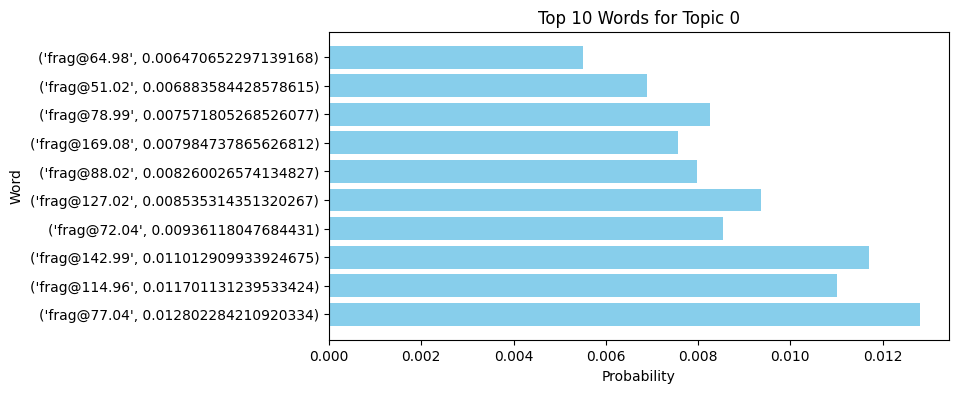

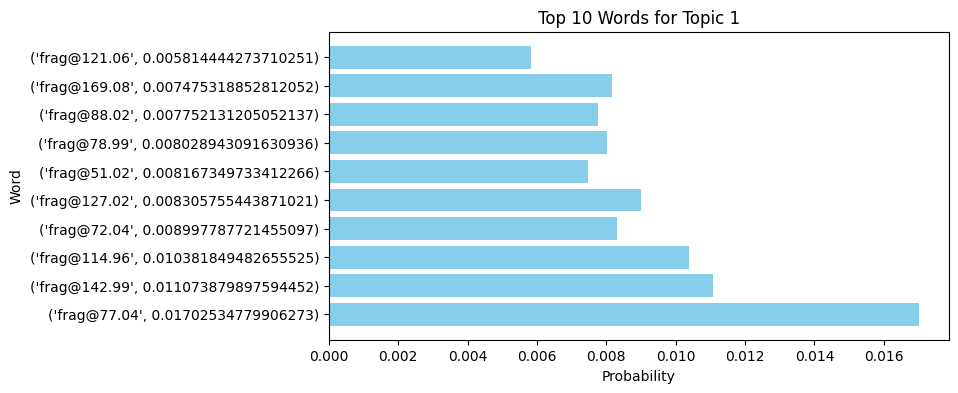

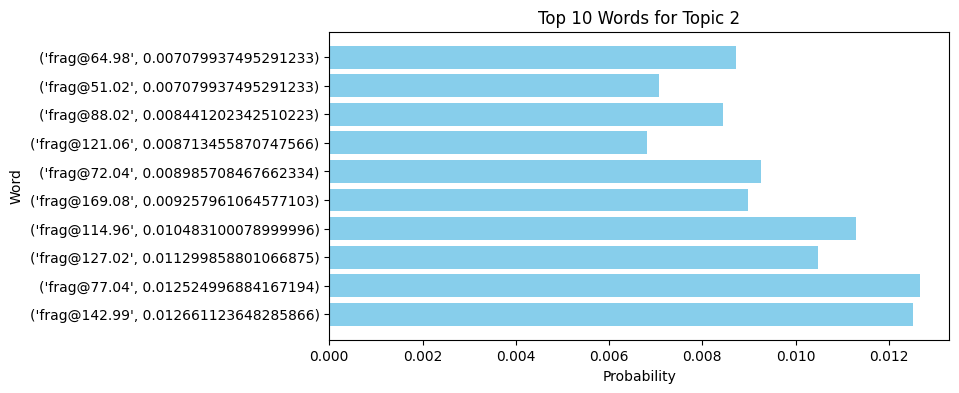

In [33]:
# Visualize topic-word distributions for top words
n_top_words = 10
for k in range(0,3):
    top_words = trained_ms2lda.get_topic_words(k, top_n=n_top_words)
    top_words_prob = trained_ms2lda.get_topic_word_dist(k)[:n_top_words]
    plt.figure(figsize=(8, 4))
    plt.barh(range(n_top_words), top_words_prob, color='skyblue')
    plt.yticks(range(n_top_words), top_words)
    plt.title(f'Top {n_top_words} Words for Topic {k}')
    plt.xlabel('Probability')
    plt.ylabel('Word')
    plt.show()

In [40]:
trained_ms2lda.get_count_by_topics()

array([7233, 7193, 7314, 7147, 7414, 7333, 7205, 7300, 7327, 7303, 7167,
       7088, 7276, 7199, 7201, 7203, 7341, 7250, 7390, 7223, 7412, 7200,
       7113, 7279, 7309, 7290, 7217, 7237, 7160, 7229, 7401, 7164, 7170,
       7270, 7291, 7297, 7390, 7280, 7270, 7144, 7328, 7243, 7216, 7284,
       7151, 7317, 7172, 7329, 7304, 7208], dtype=uint64)

In [68]:
trained_ms2lda.get_topic_words(11)
#trained_ms2lda.get_topic_word_dist(3)

for k in range(trained_ms2lda.k):
    if not trained_ms2lda.is_live_topic(k): continue
    print('Top 10 words of topic #{}'.format(k))
    print(trained_ms2lda.get_topic_words(k, top_n=3))

AttributeError: 'tomotopy.LDAModel' object has no attribute 'is_live_topic'

In [121]:
imp_list=[]
top_list=[]
for k in range(trained_ms2lda.k):
    top_n=trained_ms2lda.get_topic_words(k, top_n=3)
    top_list.append(top_n)
    frag_list = [item[0] for sublist in top_list for item in sublist]

def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            result.append(item)
            seen.add(item)
    return result

# Example usage:
rem_frag = remove_duplicates(frag_list)
print(rem_frag)

#top frag/losses 

['frag@77.04', 'frag@114.96', 'frag@142.99', 'frag@127.02', 'frag@72.04', 'frag@88.02']


In [ ]:
#tmp.report(trained_ms2lda, docs=feature_words, height=400, width=250)

In [44]:
#Quick way of savin the LDA output into a list (pickle)
import pickle

folder_path = "test_data"
# Save the list to a file
with open(os.path.join(folder_path, 'motifs.pkl'), 'wb') as f:
    pickle.dump(motifs, f)

In [ ]:
folder_path = "test_data"
# Save the list to a file
with open(os.path.join(folder_path, 'motifs_spectra.pkl'), 'wb') as f:
    pickle.dump(motif_spectra, f)

In [ ]:
folder_path = "test_data"
# Save the list to a file
with open(os.path.join(folder_path, 'corpus.pkl'), 'wb') as f:
    pickle.dump(feature_words, f)

In [ ]:
import joblib
import os

folder_path = "test_data"
#Load the motifs from MS2LDA Run_Template as a list
lda_model = joblib.load(os.path.join(folder_path, 'motifs.pkl'))

motifs_spectra = joblib.load(os.path.join(folder_path, 'motifs_spectra.pkl'))

corpus = joblib.load(os.path.join(folder_path, 'corpus.pkl'))

In [ ]:
import pickle as pkl

with open(os.path.join(folder_path, 'motifs.pkl'), 'rb') as file:
    model = pkl.load(file)

print(model)

In [ ]:
import tmplot as tmp
phi = tmp.get_phi(model)
phi.head()

In [ ]:
topics_coords = tmp.prepare_coords(model)
topics_coords.head()

In [ ]:
motifs_spectra[1].plot()